In [30]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import beta

In [31]:
folder_path = "../data/language_data/Ruby_trend.csv"
first_reader = csv.reader(open(folder_path, "rt"), delimiter=",") #read the .csv
next(first_reader, None) #skip the first row, that's just the column names
x = list(first_reader)

years=[]
repo_count=[]

for i in x:
    years.append(i[0])
    repo_count.append(i[1])

x_vals = np.array(years).astype(np.int)
y_vals = np.array(repo_count).astype(np.float)

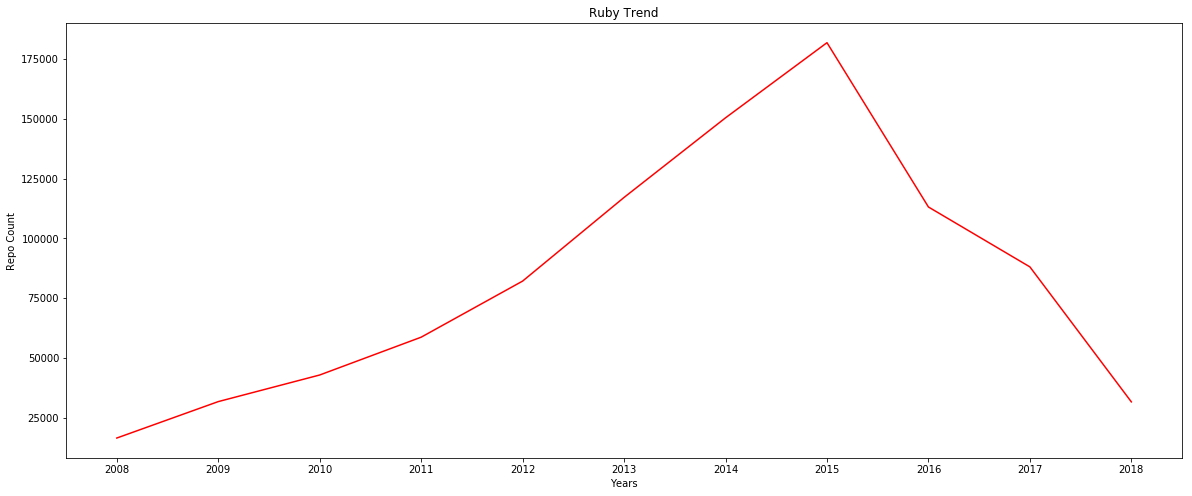

In [48]:
plt.figure(figsize=(20,8))

plt.plot(x_vals, y_vals, color='red')
plt.xticks(x_vals)
plt.xlabel('Years')
plt.ylabel('Repo Count')
plt.title('Ruby Trend')
plt.show()
 

In [33]:
print (x_vals)
print (y_vals)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
[  16452.   31688.   42816.   58631.   82093.  117088.  150380.  181804.
  113085.   88035.   31575.]


In [34]:
sigma_x=[0]*len(x_vals)
#0 -> 0 at ith position means there was a decrease from the prev. year
#1 -> 1 at ith position means there was an increase from the prev. year
for i in range(1,len(y_vals)):
    if y_vals[i]>y_vals[i-1]:
        sigma_x[i]=1

print (sigma_x)

[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [35]:
#find the beta distribution
alpha=1
beta=1
n=1
mean=[]

for i in range(1,len(x_vals)):
    alpha=sigma_x[i]+alpha
    beta=n-sigma_x[i]+beta
    mean.append(alpha / (alpha+beta))

#print (mean)

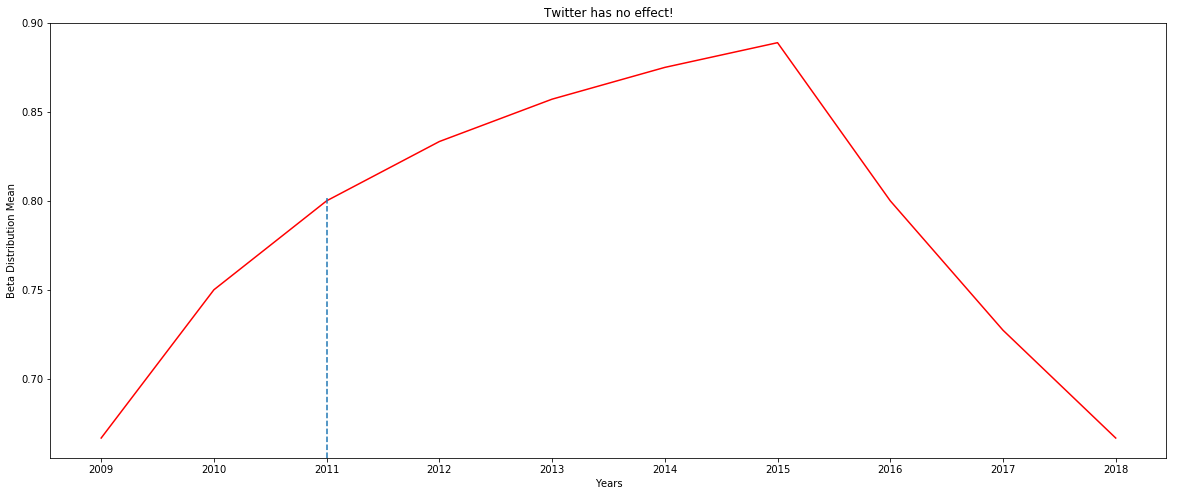

In [46]:
plt.figure(figsize=(20,8))

plt.plot(x_vals[1:], mean, color='red')
plt.xticks(x_vals[1:])
plt.xlabel('Years')
plt.ylabel('Beta Distribution Mean')
plt.title('Twitter has no effect!')
plt.axvline(x=2011,linestyle='--',ymin=0, ymax=0.60)

plt.show()
 